# First- Set-up
1. Load all packages 
2. Load data with pandas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
df=pd.read_csv('computing_c.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7380 entries, 0 to 7379
Data columns (total 6 columns):
time         7380 non-null int64
reference    7380 non-null float64
T F out      7380 non-null float64
T C in       7380 non-null float64
T F in       7380 non-null float64
T C out      7380 non-null float64
dtypes: float64(5), int64(1)
memory usage: 346.0 KB


In [3]:
df.head()

,time,reference,T F out,T C in,T F in,T C out
0,3619676122,296.395542,41.517243,18.983001,41.575029,19.238459
1,3619676122,296.388247,41.567831,18.897041,41.394464,19.231113
2,3619676123,296.395542,41.575029,19.002654,41.652072,19.317050
3,3619676123,296.388247,41.452256,18.936349,41.548570,19.270410
4,3619676124,296.388247,41.336670,18.877387,41.471519,19.348999


In [4]:
df3=pd.read_csv('computing_i.csv')
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7904 entries, 0 to 7903
Data columns (total 6 columns):
time         7904 non-null int64
reference    7904 non-null float64
T F out      7904 non-null float64
T C in       7904 non-null float64
T F in       7904 non-null float64
T C out      7904 non-null float64
dtypes: float64(5), int64(1)
memory usage: 370.6 KB


In [5]:
df3.head()

,time,reference,T F out,T C in,T F in,T C out
0,3627490750,298.591174,39.793629,41.066134,40.584289,40.179385
1,3627490750,298.583879,39.921436,41.386462,40.615627,40.075737
2,3627490751,298.591174,39.967235,41.181747,40.680674,40.044385
3,3627490751,298.583879,39.902147,41.405727,40.654181,40.152880
4,3627490752,298.591174,40.044385,41.008323,40.738502,40.140815


In [6]:
df4=pd.read_csv('computing_fluxes.csv')
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
Operation                 2 non-null object
Ammonia Flux (mol/m2h)    2 non-null float64
Water Flux (kg/m2h)       2 non-null float64
dtypes: float64(2), object(1)
memory usage: 128.0+ bytes


In [7]:
df4

,Operation,Ammonia Flux (mol/m2h),Water Flux (kg/m2h)
0,CMD,13.51,8.950
1,IMD,13.92,-0.802


In [8]:
df4=df4.set_index('Operation')

In [9]:
df4

,Ammonia Flux (mol/m2h),Water Flux (kg/m2h)
Operation,,
CMD,13.51,8.950
IMD,13.92,-0.802


In [10]:
df5=pd.read_csv('computing_characteristic.csv')
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
characteristic    6 non-null object
value             6 non-null float64
dtypes: float64(1), object(1)
memory usage: 176.0+ bytes


In [11]:
df5

,characteristic,value
0,ks (W/(mK)),0.160
1,kg (W/(mK)),0.027
2,pososity,0.800
3,membrane thickness (um),110.000
4,h_h (W/(m2K)),3546.000
5,h_c (W/(m2K)),934.000


## Project Goal

Determine interfacial temperatures resulting from conductive and convective heat transfer under operation of conventional membrane distillation, CMD, and the novel technique titled isothermal membrane distillation, IMD. CMD is operation of membrane distillation where the feed stream is heated and the collector steam is cooled. This technique was developed for desalination purposes. In membrane distillation, the difference in vapor pressure between two streams, feed and collector, drives permeation. Thus, for purposes of desalination, salt water in the feed stream was heated to encourage high vapor pressure of water and the collector stream was cooled to lower vapor pressure of water- the result is a driving force for water permeation. However, the research conducted in my lab aims to utilize membrane distillation for recovering ammonia from urine. Therefore, for our purposes, we desire high ammonia flux (thus need a difference in ammonia vapor pressure to drive permeation) with minimal water flux (water flux would dilute the collected ammonia product). The idea of IMD is to maintain equal bulk temperatures of feed and collector to minimize driving force for water flux (vapor pressure is dependent on temperature and concentration, where the concentration of water is essentially equal in feed and collector), while still driving ammonia flux (through an ammonia concentration gradient between feed and collector). Experimentally, we achieved desired performance for IMD, but in order to better understand the transport of components we want to understand the temperature polorization in IMD as compared to CMD. Temperature polarization refers to temperatures of the bulk and interface of each stream being different due to heat transfer across the membrane. Often, temperature polarization results in a decrease in performance, thus it is desired to minimize this phenomena.
**Hypothesis:** The temperature differential imposed in CMD results in additional convective and conductive heat transfer, which results in signficiant temperature polarization as compared to the novel IMD approach. 

**Step 1**, I demonstrate the flux of ammonia and water for both operations. Note that for the purposes of ammonia recovery, high ammonia flux with minimized ammonia flux is desired. The fluxes demonstrate performances for both techniques and will also be utilized in determining convective heat transport across the membrane (discussed later). This first step leads to Figure 1. 

**Step 2** is plotting the experimental temperature profiles for both operations. This data will be used to estimate the mean temperature of the bulk feed and bulk collector temperatures in CMD and IMD, which will be used for calculation of convective heat transport and temperature polarization. This step leads to Figures 2 and 3. 

**Step 3** is the determination of convective heat transport. Convective heat transport is the result of phase change energies required to vaporize ammonia and water, transport them across the membrane, then condense the components in the other stream. This step leads to Figure 4. 

**Step 4** is the determination of interfacial temperatures at the feed and collector sides of the membrane (for both operations) resulting from temperature polarization. This leads to Figure 5. 

**Step 5** is the determination of conductive heat transport for both operations. This leads to Figure 6. 

**Step 6** is the determination of the actual driving force for vapor permeation based on the interfacial temperatures compared to driving force as predicted by bulk temperatures. This leads to figure 7. 

# Step 1- CMD and IMD Fluxes
**Plot ammonia and water flux for both operations- for figure 1**

(-1, 20)

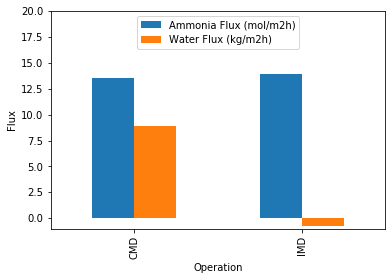

In [12]:
ax=df4.plot(kind='bar')
ax.set_ylabel('Flux')
ax.legend(loc=9)
ax.set_ylim((-1,20))

**Figure 1.** This plot demonstrates the flux of ammonia and water under both operations, CMD and IMD. It can be seen that ammonia fluxes are quite similar under both operations, while water flux is greatly suppressed under operation of IMD or Isothermal membrane distillation, as opposed to the conventional case, CMD. For this reason, IMD operation is more selective in terms of ammonia transport. Also, the lower water flux will result in lessened convective heat transfer to support water phase changes as we will see later.

# Step 2- Experimental Temperature Profiles 

Change time to an actual time value

In [13]:
df3.time=df3.time-df3.time[0]
df3.time=pd.to_timedelta(df3.time,unit='seconds')
df3.head()

,time,reference,T F out,T C in,T F in,T C out
0,00:00:00,298.591174,39.793629,41.066134,40.584289,40.179385
1,00:00:00,298.583879,39.921436,41.386462,40.615627,40.075737
2,00:00:01,298.591174,39.967235,41.181747,40.680674,40.044385
3,00:00:01,298.583879,39.902147,41.405727,40.654181,40.152880
4,00:00:02,298.591174,40.044385,41.008323,40.738502,40.140815


In [14]:
df.time=df.time-df.time[0]
df.time=pd.to_timedelta(df.time,unit='seconds')
df.head()

,time,reference,T F out,T C in,T F in,T C out
0,00:00:00,296.395542,41.517243,18.983001,41.575029,19.238459
1,00:00:00,296.388247,41.567831,18.897041,41.394464,19.231113
2,00:00:01,296.395542,41.575029,19.002654,41.652072,19.317050
3,00:00:01,296.388247,41.452256,18.936349,41.548570,19.270410
4,00:00:02,296.388247,41.336670,18.877387,41.471519,19.348999


**Plot temp. profile for feed and collector for both operations- for fig 2 and 3**

Text(0.5, 0, 'Time (sec.)')

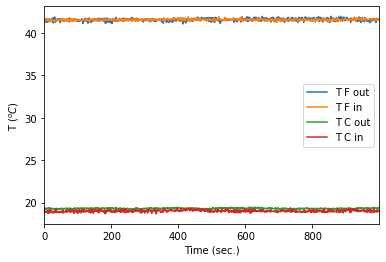

In [15]:
#CMD bulk temperature profile- feed inlet and outlet temperatures are near 40 deg C, which is the goal temperature of operation, while the inlet and outlet collector temperatures are near 20. In CMD operation, a temperature differential between the feed and collector exists. 
(df['T F out'][0:1000]).plot(x='time')
(df['T F in'][0:1000]).plot(x='time')
(df['T C out'][0:1000]).plot(x='time')
(df['T C in'][0:1000]).plot(x='time')
plt.legend()
plt.ylabel(r'T ($^oC$)')
plt.xlabel('Time (sec.)')

**Figure 2.** This plot demonstrates the bulk temperature profile for CMD operation. 'T F' is the bulk temperature of the feed and 'T C' is the bulk temperature of the collector. The "in" and "out" refer to temperatures taken at the inlet and outlet locations on either side of the membrane cell. It is experimentally difficult to measure temperatures within the membrane cell, so inlet and outlet temperatures in the tubing feeding the cell were measured via thermocouples. 
For CMD oepration, it can be seen that there is an imposed temperature differential between the feed and collector. We aim for 40 deg. C and 20 deg C., but experimentally it is difficult to achieve these temperatures exactly. Therefore, this plot demonstrates the temperature profile over time. 

Text(0.5, 0, 'Time (sec.)')

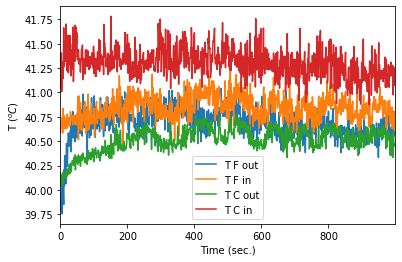

In [16]:
#IMD bulk temperature profile- feed and collector bulk temperatures are around 40 deg C, which is the goal operation temperature
(df3['T F out'][0:1000]).plot(x='time')
(df3['T F in'][0:1000]).plot(x='time')
(df3['T C out'][0:1000]).plot(x='time')
(df3['T C in'][0:1000]).plot(x='time')
plt.legend()
plt.ylabel(r'T ($^oC$)')
plt.xlabel('Time (sec.)')

**Figure 3.** This plot demonstrates the bulk temperature profile for IMD operation. Similarly to Fig. 2, the bulk feed and collector temperatures at the inlet and outlet of the membrane cell was measured over the duration of the experiment. It can be seen for IMD operation that both collector and feed temperatures are about the same (note that the y-axis of this plot is over a significantly lower range than in Fig. 2). The temperatures we aimed for were 40 deg. C for both the bulk feed and bulk collector temperatures. Again, experimentally this is a bit difficult. 

# Step 3- Determination of Convective Heat Transfer

**Next Step** Calculate average temperature for feed and collector for both operations. The average is taken over time and between the inlet and outlet temperatures. These average temperatures will be used in the calculation of enthalpy of vaporization (required for convective heat transfer calculation). 

In [17]:
#Mean of Temperature of the Feed for CMD
d= df.describe()
T_bulk_feed_CMD_mean=np.mean([d.loc['mean','T F out'],d.loc['mean','T F in']])
T_b_f_c=T_bulk_feed_CMD_mean
T_b_f_c

41.53627445155826

In [18]:
#Similarly Mean of Temperature of the Collector for CMD
T_bulk_collector_CMD_mean=np.mean([d.loc['mean','T C out'],d.loc['mean','T C in']])
T_b_c_c=T_bulk_collector_CMD_mean
T_b_c_c

19.154347859823847

In [19]:
#Mean of Temperature of the Feed for IMD
d3=df3.describe()
T_bulk_feed_IMD_mean=np.mean([d3.loc['mean','T F out'],d3.loc['mean','T F in']])
T_b_f_i=T_bulk_feed_IMD_mean
T_b_f_i

40.360440022963054

In [20]:
#Similarly, the mean of Temperature of the Collector for IMD
T_bulk_collector_IMD_mean=np.mean([d3.loc['mean','T C out'],d3.loc['mean','T C in']])
T_b_c_i=T_bulk_collector_IMD_mean
T_b_c_i

40.53054612297571

**Next Step** estimate convective heat transfer based on bulk temperatures. First for ammonia. we calculate saturated vapor and liquid enthalpies for both CMD and IMD. Enthalpy of vaporization is the difference between saturated vapor and saturated liquid enthalpy. 

In [21]:
#estimate enthalpy of vaporization of ammonia based on empirical measurements on NIST- closest data we have is at 40 deg. C and 42 deg. C, so we interpolate to find estimates at the temperatures of the bulk feed
#specific enthalpy units in kJ/kg
Sat_liq_T_40= 371.9
Sat_liq_T_42= 381.8
Sat_vap_T_40= 1473.3
Sat_vap_T_42= 1473.8
#interpolate the specific enthalpy of sat-liquid and sat-vapor at the temperature of the CMD and IMD feeds
#start with sat-liquid for CMD case
#make a interpolator function to help us
def interp(y1,y2,x1,x2,T):
    return y1+(y2-y1)/(x2-x1)*(T-x1)
Sat_liq_CMD=interp(Sat_liq_T_42,Sat_liq_T_40,42,40,T_b_f_c)
Sat_liq_CMD

379.5045585352134

In [22]:
#next sat vapor for CMD case
Sat_vap_CMD=interp(Sat_vap_T_42,Sat_vap_T_40,42,40,T_b_f_c)
Sat_vap_CMD

1473.6840686128896

In [23]:
#next sat liq for IMD case
Sat_liq_IMD=interp(Sat_liq_T_42,Sat_liq_T_40,42,40,T_b_f_i)
Sat_liq_IMD

373.6841781136671

In [24]:
#next sat liq for IMD case
Sat_vap_IMD=interp(Sat_vap_T_42,Sat_vap_T_40,42,40,T_b_f_i)
Sat_vap_IMD

1473.3901100057408

Enthalpy of vaporization is the difference between the specific enthalpy of saturated vapor and specific enthalpy of saturated liquid

In [25]:
#enthalpy of vaporizing ammonia for CMD in units of kJ/kg
En_vap_a_CMD=Sat_vap_CMD-Sat_liq_CMD
En_vap_a_CMD

1094.1795100776762

In [26]:
#enthalpy of vaporizing ammonia for CMD in units of K/kg
En_vap_a_IMD=Sat_vap_IMD-Sat_liq_IMD
En_vap_a_IMD

1099.7059318920737

Estimate the enthalpy of vaporization for water based on bulk temperatures- note that based on the negative flux of water, in other words the flux of water from collector to feed, during IMD the evaporative energy will be based on the collector side temperature, while for CMD when water vaporizes in the feed and transports to the collector, the enthalpy of vaporization is based on the feed side temperature.
Data is avaialble for enthalpy of vaporization, so we can skip the step of specific enthalpy of saturated vapor-specific enthalpy of liquid and calculate enthalpy of vaporization directly

In [27]:
#plug in enthalpies of vaporization at 40 and 44 deg. C to calculate for the exact CMD and IMD bulk feed temperatures
#units of kJ/kg
En_vap_w_CMD=interp(2396.4,2406.0,44,40,T_b_f_c)
En_vap_w_CMD

2402.31294131626

In [28]:
#because water vaporizes in the collector and transports from collector to feed, as indicated by experimental negative flux, we use bulk collector temperature
En_vap_w_IMD=interp(2396.4,2406.0,44,40,T_b_c_i)
En_vap_w_IMD

2404.726689304858

In [29]:
#calculate convective heat transfer- flux of component*enthalpy of vaporization of that component 
Q_w_CMD=En_vap_w_CMD*df4['Water Flux (kg/m2h)'][0]
Q_w_CMD

21500.700824780528

In [30]:
Q_w_IMD=En_vap_w_IMD*df4['Water Flux (kg/m2h)'][1]
Q_w_IMD

-1928.5908048224962

In [31]:
#same thing for ammonia, but we need to adjust units of flux for ammonia to kg
Q_a_CMD=En_vap_a_CMD*df4['Ammonia Flux (mol/m2h)'][0]*17/1000
Q_a_CMD

251.30020807953989

In [32]:
Q_a_IMD=En_vap_a_IMD*df4['Ammonia Flux (mol/m2h)'][1]*17/1000
Q_a_IMD

260.2344117229403

Instead of doing the above calculations, I could have been more efficient and done that calculations directly to the df and make plotting easier
I will still keep the above calculations as a check on this next part.
**Plot convective heat transfer for both operations- fig 4**

Text(0, 0.5, 'Convective heat transfer ($kJ/m^2h$)')

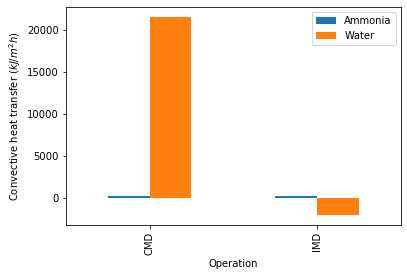

In [33]:
df6=df4
df6['Ammonia Flux (mol/m2h)'][0]=En_vap_a_CMD*df6['Ammonia Flux (mol/m2h)'][0]*17/1000
df6['Ammonia Flux (mol/m2h)'][1]=En_vap_a_IMD*df6['Ammonia Flux (mol/m2h)'][1]*17/1000

df6['Water Flux (kg/m2h)'][0]=En_vap_w_CMD*df6['Water Flux (kg/m2h)'][0]
df6['Water Flux (kg/m2h)'][1]=En_vap_w_IMD*df6['Water Flux (kg/m2h)'][1]
df6=df6.rename(columns={'Ammonia Flux (mol/m2h)':'Ammonia','Water Flux (kg/m2h)':'Water'})
ax6=df6.plot(kind='bar')
ax6.set_ylabel(r'Convective heat transfer ($kJ/m^2h$)')


**Figure 4.** This plot demonstrates the convective heat transfer that results from the vaporization and condensation of each component, ammonia and water. For ammonia transport, ammonia in the aqueous liquid feed solution vaporizes and transports across the membrane to the collector where it condenses. The vaporization of water either occurs in the feed or collector depending on the operation. In CMD, water vaporizes in the feed and transports to the collector where it condenses. In IMD, due to convective heat transport from ammonia permeation there is slight temperature polarization (discussed later) that drives water in the opposite direction- thus water vaporizes in the collector and transports to the feed. For this reason, the convective heat transport from water permeation is represented as negative- that is heat is transported from collector to feed. It is evident from this plot that 
1. water flux is the major contributor of convective heat flux because water flux is higher and the enthalpy of vaporizing water is higher
2. convective heat transfer is lower for IMD operation than CMD operation. This is because the magnitude of water flux is significantly lower for IMD than for CMD

# Step 4- Determination of Interfacial Temperatures 

**Next step**- Calculation of interfacial temperatures, this requires the input other operational parameters and membrane characteristics in order to calculate the other type of heat transfer-conductive

In [34]:
#membrane thermal conductivity, w/mK, k_s
k_s=0.16
#vapor thermal conductivity, w/mK, k_g
k_g=0.027
#porosity, e 
e=0.8
#membrane thickness, m, d 
d=110/10**6
#boundary layer coefficients- estimated from literature, W/m2K, h_h and h_c for the "hot" and "cold" 
h_h= 3546
h_c= 934 

In [35]:
#overall membrane thermal conductivity, w/mK is a function of the membrane and vapor thermal conductivities and porosity as so
k_m=e*k_g+(1-e)*k_s
k_m

0.053599999999999995

**Next** Calculate interfacial temperatures

In [36]:
#Interfacial Temperature on Feed side Function, I am converting units back to deg. C
def i_F(k_m,d,T_b_c,h_f,h_p,T_b_f,Q_L):
    return (k_m/d*(T_b_c+h_f/h_p*T_b_f)+h_f*T_b_f-Q_L)/(k_m/d+h_f*(1+k_m/(d*h_p)))-273

In [37]:
#Interfacial Temperature on Collector side Function 
def i_C(k_m,d,T_b_c,h_f,h_p,T_b_f,Q_L):
    return (k_m/d*(T_b_f+h_p/h_f*T_b_c)+h_c*T_b_c-Q_L)/(k_m/d+h_p*(1+k_m/(d*h_f)))-273

In [38]:
#First for CMD, convert units to be consistent with kg, m, K, s 
#CMD- Interfacial Feed Temperature
Q_L_CMD=(Q_w_CMD+Q_a_CMD)/3600
T_b_c_c_conv=T_b_c_c+273
T_b_f_c_conv=T_b_f_c+273
k_m=k_m
d=d
T_m_F_CMD=i_F(k_m,d,T_b_c_c_conv,h_h,h_c,T_b_f_c_conv,Q_L_CMD)
T_m_F_CMD

39.6814894498786

In [39]:
#Similarly for CMD- Interfacial Collector Temperature
T_m_C_CMD=i_C(k_m,d,T_b_c_c_conv,h_h,h_c,T_b_f_c_conv,Q_L_CMD)
T_m_C_CMD

26.18837780493186

In [40]:
#IMD-Interfacial Feed Temperature
Q_L_IMD=(Q_w_IMD+Q_a_IMD)/3600
T_b_c_i_conv=T_b_c_i+273
T_b_f_i_conv=T_b_f_i+273
T_m_F_IMD=i_F(k_m,d,T_b_c_i_conv,h_h,h_c,T_b_f_i_conv,Q_L_IMD)
T_m_F_IMD

40.37460764162131

In [41]:
#IMD-Interfacial Collector Temperature
T_m_C_IMD=i_C(k_m,d,T_b_c_i_conv,h_h,h_c,T_b_f_i_conv,Q_L_IMD)
T_m_C_IMD

40.47735583666332

**Plot bulk temperature and interfacial temperature for each operation- for fig 5**

In [42]:
l = ['CMD', 'IMD']
data = {'Bulk Feed': [T_b_f_c,T_b_f_i], 
       'Interfacial Feed': [T_m_F_CMD,T_m_F_IMD], 'Bulk Collector': [T_b_c_c,T_b_c_i],
       'Interfacial Collector': [T_m_C_CMD,T_m_C_IMD]}

df8 = pd.DataFrame(data, index=l)
df8


,Bulk Feed,Interfacial Feed,Bulk Collector,Interfacial Collector
CMD,41.536274,39.681489,19.154348,26.188378
IMD,40.360440,40.374608,40.530546,40.477356


(0, 65)

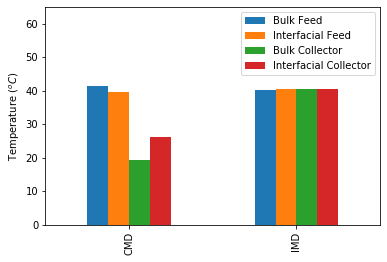

In [43]:
ax8=df8.plot(kind='bar')
ax8.set_ylabel(r'Temperature ($^oC$)')
ax8.legend()
ax8.set_ylim((0,65))

**Figure 5.** This plot shows the bulk and interfacial feed and collector temperatures for both operations, CMD and IMD. From this plot it can be seen that in IMD operation temperature polarization is quite minimal. That is the bulk and interfacial temperatures are close. 
In contrast, for CMD the bulk and interfacial temperatures are different, particuarly for the collector temperatures. 
In CMD, the conductive and convective heat transfers due to the imposed temperature differential result in a decrease in feed temperature at the interface and an increase in collector temperature at the interface. 

# Step 5- Determinaiton of Conductive Heat Transfer

**Next Step** For each operation calculate conductive heat transfer, which is a function of the transmembrane temperature gradient, in other words the difference in interfacial temperatures

In [44]:
def Q_c(k_m,d,T_1,T_0):
    return k_m/d*(T_1-T_0)
#First for CMD, kJ/m2h
Q_c_CMD=Q_c(k_m,d,T_m_F_CMD+273,T_m_C_CMD+273)
Q_c_CMD

6574.825310628591

In [45]:
#IMD Conductive heat transfer, kJ/m2h
Q_c_IMD=Q_c(k_m,d,T_m_F_IMD+273,T_m_C_IMD+273)
Q_c_IMD

-50.06639322047083

**Plot conductive heat transfer for both operations- for fig 6**

In [46]:
l2 = ['CMD', 'IMD']
data = {r'Convective Heat Transfer ($kJ/m^2h$)': [Q_c_CMD,Q_c_IMD]}

df9 = pd.DataFrame(data, index=l2)
df9

,Convective Heat Transfer ($kJ/m^2h$)
CMD,6574.825311
IMD,-50.066393


(-100, 7000)

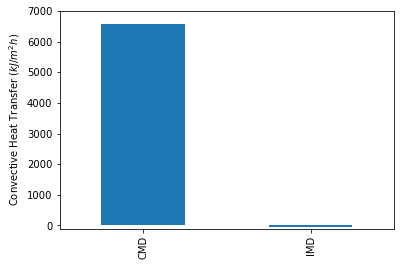

In [47]:
ax9=df9.plot(kind='bar',legend=False)
ax9.set_ylabel(r'Convective Heat Transfer ($kJ/m^2h$)')
ax9.set_ylim((-100,7000))

**Figure 6.** This plot shows the conductive heat transfer in CMD and IMD operation. Note that conductive heat transport in IMD is represented as negative which indicates heat transfer from collector to feed (the convention is the positive direction as feed to collector). From this plot it is very evident that conductive heat transfer is more significant in CMD than in IMD. In CMD, the imposed temperature differential between feed and collector results in a signficant driving force for conductive heat transfer. In IMD, the aim is to have equal bulk feed and bulk collector temperatures, however experimentally there were slight differences. Despite the very similar bulk temperatures, the phase change energy demands to support ammonia vapor permeation result in very slight temperature polarization in IMD as depicted in Figure. 5. The result of this temperature polarization is slightly different interfacial temperatures, which results in a slight driving force for conductive heat transfer. However, as seen in the figure, the driving force for conductive heat transfer is significantly less in IMD than in CMD. 

# Step 6- calculate apparent driving force for water and ammonia permeation for each operation

The driving force for vapor permeation is the difference in vapor pressure across the membrane. As discussed previously, vapor pressure of a component is dependent on both the concentration of the component and temperature of the solution. To be most accurate, the interfacial temperatures should be utilized in the estimations. The following uses equations (from empirical data on NIST) to calculate vapor pressures of ammonia as a function of the interfacial temperatures and concentrations. Note that for the purpose of this analysis constant feed ammonia concentration in the feed and negligible ammonia concentration in the collector was assumed. 

The following expression was developed by the NIST website based on empirical data. What is important here in the context of this analysis is that we plug in the temperature of the feed at the surface of the membrane. 

In [48]:
VP_A_F_CMD=100000/(59*np.exp(4100*((1/(T_m_F_CMD+273.15)-1/298.15)))*1/.226)
VP_A_F_CMD


730.3600482265857

In [49]:
VP_A_F_IMD=100000/(59*np.exp(4100*((1/(T_m_F_IMD+273.15)-1/298.15)))*1/.226)
VP_A_F_IMD

751.8310788539345

Now let's compare the actual vapor pressure gradient (which driving ammonia transport) to the vapor pressure gradient without temperature polarization (i.e., same equation, but using the bulk feed temperature). 

In [50]:
VP_A_F_CMD_no_TP=100000/(59*np.exp(4100*((1/(T_b_f_c+273.15)-1/298.15)))*1/.226)
VP_A_F_CMD_no_TP

789.0155046396247

In [51]:
VP_A_F_IMD_no_TP=100000/(59*np.exp(4100*((1/(T_b_f_i+273.15)-1/298.15)))*1/.226)
VP_A_F_IMD_no_TP

751.3869090500151

**Next step plot the apparent driving force for water and ammonia for each operation- fig 7**

In [52]:
l3 = ['CMD', 'IMD']
data = {'Without T-Polarization': [VP_A_F_CMD_no_TP,VP_A_F_IMD_no_TP], 
       'Considering T-Polarization': [VP_A_F_CMD,VP_A_F_IMD]}

df10 = pd.DataFrame(data, index=l3)
df10

,Without T-Polarization,Considering T-Polarization
CMD,789.015505,730.360048
IMD,751.386909,751.831079


(0, 1000)

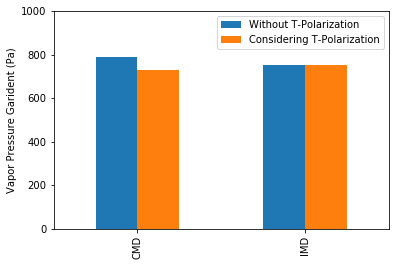

In [53]:
ax10=df10.plot(kind='bar')
ax10.set_ylabel('Vapor Pressure Garident (Pa)')
ax10.legend()
ax10.set_ylim((0,1000))

**Figure 7** Ammonia vapor pressure gradient, which is the driving force for ammonia permeation, for CMD and IMD estimated from temperatures without T-polarization and the more accurate estimation of with considering T-polarization. From this plot it can be seen that the driving force for ammonia permeation (the vapor pressure gradient) decreases signficiantly for CMD when we consider the effects of T-polarization, while for IMD the difference is quite minimal (actually a slight positive change). This is because the degree of temperature polarization is more signficiant for CMD than for IMD due to the higher convective and conductive heat transfer in CMD. 
Note that ideally the control driving force (without t-polarization) would be equal for CMD and IMD (that is if both experimental conditions were of exactly 40 deg. C bulk temperature). However, due to imperfections in experimental conditions, the bulk temperatures are slightly different. Thus, the comparison is not as exact. 


# End Result #
The conclusion of this analysis is that IMD improves the performance for ammonia recovery compared to CMD by decreasing convective and conductive heat transfer, which results in more mininmal temperature polarizaiton, which results in an improved driving force for ammonia permeation. 

To view this as a binder click here
[![Binder](https://mybinder.org/badge.svg)](http://mybinder.org/v2/gh/sm4386/Project/master)